## Importing Necessary Libariries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Reading the data

In [2]:
flights_df = pd.read_csv("FlightDelays.csv")
print(flights_df)

      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM  \
0             1455      OH      1455  JFK       184  01/01/2004    5935   
1             1640      DH      1640  JFK       213  01/01/2004    6155   
2             1245      DH      1245  LGA       229  01/01/2004    7208   
3             1715      DH      1709  LGA       229  01/01/2004    7215   
4             1039      DH      1035  LGA       229  01/01/2004    7792   
...            ...     ...       ...  ...       ...         ...     ...   
2196           645      RU       644  EWR       199   1/31/2004    2761   
2197          1700      RU      1653  EWR       213   1/31/2004    2497   
2198          1600      RU      1558  EWR       199   1/31/2004    2361   
2199          1359      RU      1403  EWR       199   1/31/2004    2216   
2200          1730      RU      1736  EWR       199   1/31/2004    2097   

     ORIGIN  Weather  DAY_WEEK  DAY_OF_MONTH TAIL_NUM Flight Status  
0       BWI        0         

In [3]:
flights_df.shape

(2201, 13)

## Renaming the columns

In [4]:
flights_df.columns = [s.strip().replace(' ', '_').upper() for s in flights_df.columns]
flights_df.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'WEATHER', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FLIGHT_STATUS'],
      dtype='object')

In [5]:
## checking the null values

In [6]:
flights_df.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
WEATHER          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
FLIGHT_STATUS    0
dtype: int64

## Understanding of data

In [7]:
flights_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


 Now looking at the summary statistics, we will drop the row which has minimum value for 10 according to our analysis of being an incorrect value

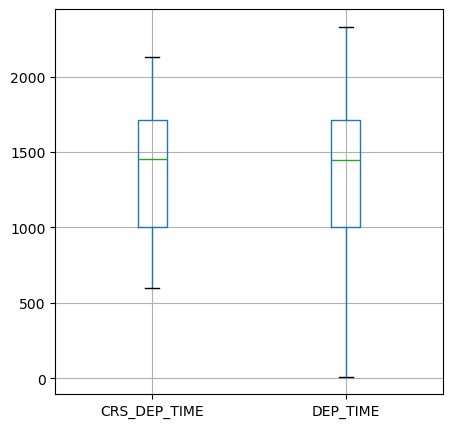

In [8]:
#Distributed of scheduled departure time and actual departure time
plt.figure(figsize=(5,5))
flights_df.boxplot(column=["CRS_DEP_TIME","DEP_TIME"])
plt.show()

In [9]:
# Drop rows where DEP_TIME is 10
flights_df = flights_df[flights_df['DEP_TIME'] != 10]
flights_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,DAY_WEEK,DAY_OF_MONTH
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1371.598636,1369.916818,211.863636,3813.327727,0.014545,3.906818,16.023636
std,432.501297,441.612605,13.314831,2408.884969,0.119751,1.902572,8.679131
min,600.000000,109.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.750000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,5990.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


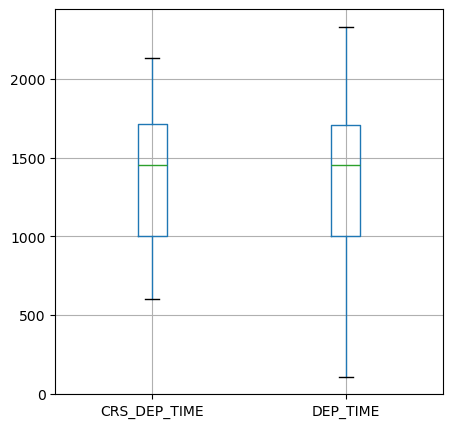

In [10]:
#After dropping the row
#Distributed of scheduled departure time and actual departure time
plt.figure(figsize=(5,5))
flights_df.boxplot(column=["CRS_DEP_TIME","DEP_TIME"])
plt.show()

In [11]:
flights_df.dtypes

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
WEATHER           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
FLIGHT_STATUS    object
dtype: object

## Analysis of the data

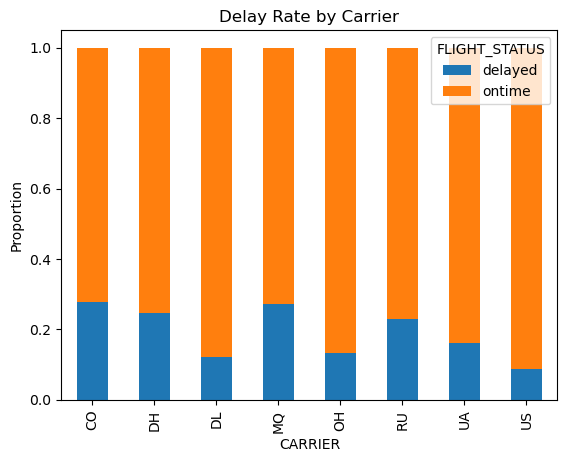

In [12]:
# Delay rate by carrier
carrier_delay_rate = flights_df.groupby('CARRIER')['FLIGHT_STATUS'].value_counts(normalize=True).unstack()
carrier_delay_rate.plot(kind='bar', stacked=True)
plt.title('Delay Rate by Carrier')
plt.ylabel('Proportion')
plt.show()

1. The carriers MQ (likely American Eagle) and RU show the highest proportion of delayed flights among the carriers listed.
2. DL (Delta Air Lines) has the lowest proportion of delayed flights
3. There is a noticeable variation in delay proportions among carriers. Some carriers like MQ and RU have higher delays, while others like DL, UA and US  have lower delays.


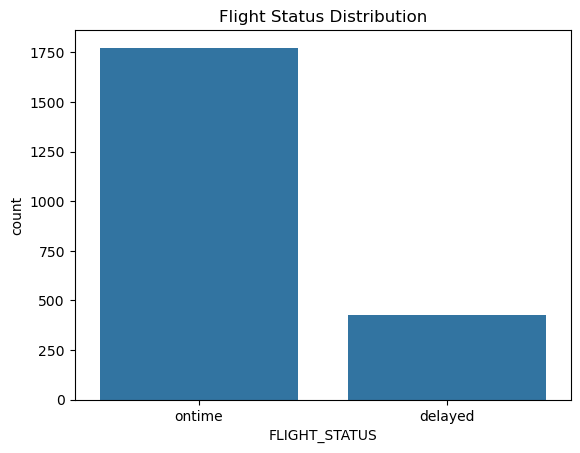

In [13]:
# Bar plot for Flight Status
sns.countplot(x='FLIGHT_STATUS', data=flights_df)
plt.title('Flight Status Distribution')
plt.show()

In our dataset, there are more ontime flights as compared to the delayed flights

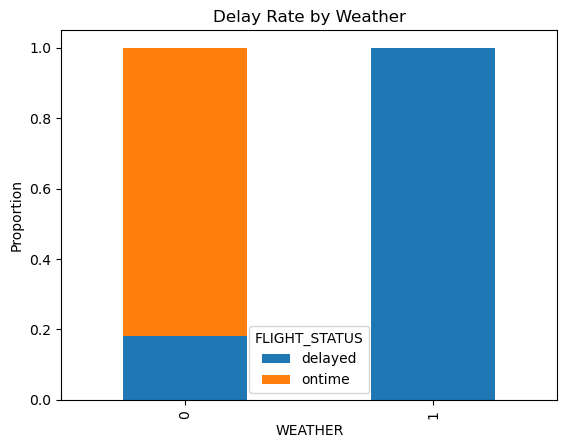

In [14]:
# Delay Rate by weather
carrier_delay_rate = flights_df.groupby('WEATHER')['FLIGHT_STATUS'].value_counts(normalize=True).unstack()
carrier_delay_rate.plot(kind='bar', stacked=True)
plt.title('Delay Rate by Weather')
plt.ylabel('Proportion')
plt.show()

1. Most flights are on time when the weather is clear. There is still a portion of flights that are delayed (about 80%) , but it is relatively small compared to the on-time flights.
2. All flights are delayed when the weather is adverse.

In [15]:
#number of flights from each airport
flights_df['ORIGIN'].value_counts()

ORIGIN
DCA    1370
IAD     685
BWI     145
Name: count, dtype: int64

Most of the flights are taking off from DCA terminal

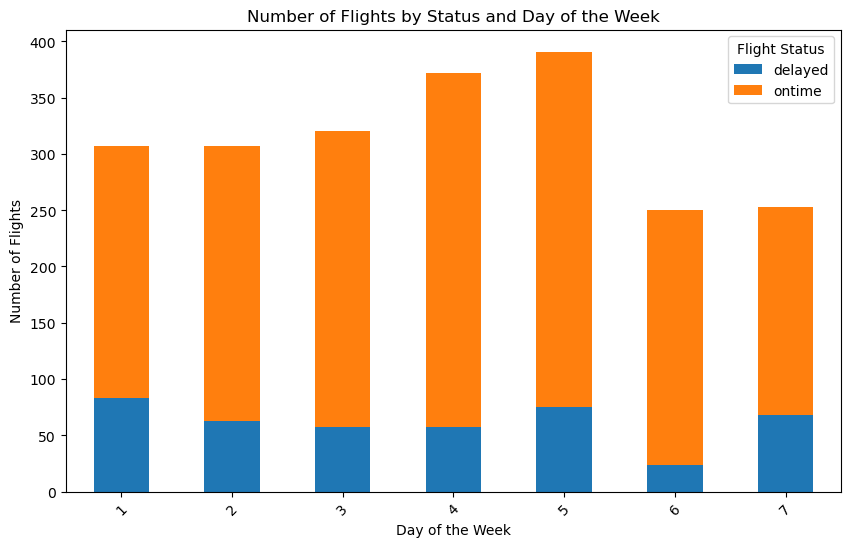

In [16]:
#to check the distribution of the flight status by the days of the week
grouped_data = flights_df.groupby(['DAY_WEEK', 'FLIGHT_STATUS']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Flights by Status and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.legend(title='Flight Status')
plt.xticks(rotation=45)
plt.show()

1. Day 5 (likely Friday) has the highest total number of flights, both on-time and delayed, compared to other days.
2. Day 7 (likely Sunday) has the lowest total number of flights.
3. In absolute numbers, Day 5 (Friday) also has the highest number of delayed flights due to its high total flight volume.
4. Day 6 (Saturday) has the lowest absolute number of delays, consistent with its lower total flight volume.

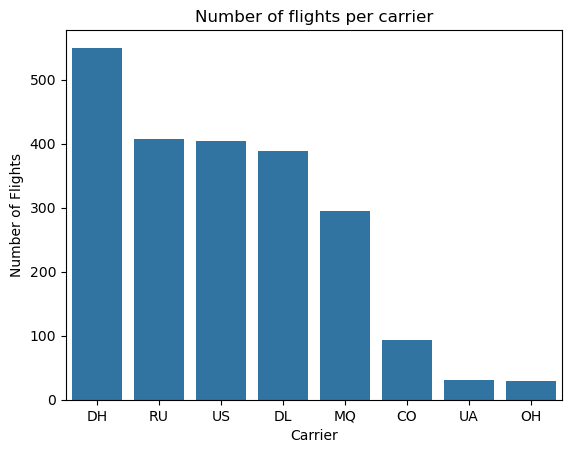

In [17]:
#distrubution of flights across carrier
carrier_counts = flights_df['CARRIER'].value_counts()
sns.barplot(x=carrier_counts.index, y=carrier_counts.values)
plt.title('Number of flights per carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()


DH carrier has the highest number of flights taking off and OH and UA has the lowest number of flights taking off

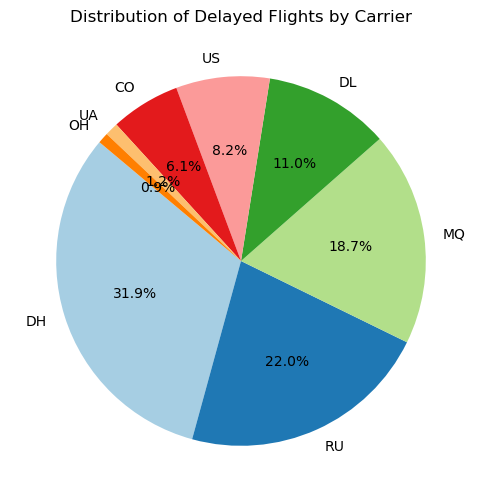

In [18]:
#delayed flights by carrier
delayed_flights = flights_df[flights_df['FLIGHT_STATUS'] == 'delayed']
carrier_delays = delayed_flights['CARRIER'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(carrier_delays, labels=carrier_delays.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Delayed Flights by Carrier')
plt.show() 

1. The majority of delayed flights are concentrated among a few carriers, specifically DH, RU, and MQ, which together account for more than 70% of all delays.
2. The carriers with the smallest proportions of delayed flights (UA and OH) contribute less than 2% combined.

## Manipulation of data for the ease in analysis

In [19]:
# changing the outcome variable column
flights_df['FLIGHT_STATUS']=np.where(flights_df['FLIGHT_STATUS'].str.contains('delayed'),1,0)
flights_df.head(5)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,WEATHER,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,0
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,0
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,0
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,0
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,0


## Specificying the predictors and Outcomes, scaling the data 

In [20]:
predictors=['DISTANCE','WEATHER','DAY_WEEK','DAY_OF_MONTH','CARRIER','DEST','ORIGIN']
X=pd.get_dummies(flights_df[predictors],drop_first=True)
X.head(5)


,DISTANCE,WEATHER,DAY_WEEK,DAY_OF_MONTH,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD
0,184,0,4,1,False,False,False,True,False,False,False,True,False,False,False
1,213,0,4,1,True,False,False,False,False,False,False,True,False,True,False
2,229,0,4,1,True,False,False,False,False,False,False,False,True,False,True
3,229,0,4,1,True,False,False,False,False,False,False,False,True,False,True
4,229,0,4,1,True,False,False,False,False,False,False,False,True,False,True


In [21]:
Y = flights_df['FLIGHT_STATUS']
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: FLIGHT_STATUS, dtype: int32

In [22]:
scaler=StandardScaler()
scaled_fd=pd.DataFrame(scaler.fit_transform(X),index=X.index,columns=X.columns)
print(scaled_fd)

      DISTANCE   WEATHER  DAY_WEEK  DAY_OF_MONTH  CARRIER_DH  CARRIER_DL  \
0    -2.093153 -0.121491  0.048988     -1.731400   -0.577350    -0.46274   
1     0.085365 -0.121491  0.048988     -1.731400    1.732051    -0.46274   
2     1.287306 -0.121491  0.048988     -1.731400    1.732051    -0.46274   
3     1.287306 -0.121491  0.048988     -1.731400    1.732051    -0.46274   
4     1.287306 -0.121491  0.048988     -1.731400    1.732051    -0.46274   
...        ...       ...       ...           ...         ...         ...   
2196 -0.966333 -0.121491  1.100435      1.725953   -0.577350    -0.46274   
2197  0.085365 -0.121491  1.100435      1.725953   -0.577350    -0.46274   
2198 -0.966333 -0.121491  1.100435      1.725953   -0.577350    -0.46274   
2199 -0.966333 -0.121491  1.100435      1.725953   -0.577350    -0.46274   
2200 -0.966333 -0.121491  1.100435      1.725953   -0.577350    -0.46274   

      CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  DEST_JFK  \
0      -0

## Checking Skewness and correlation

In [23]:
skewness=print(X.skew())

DISTANCE       -1.628363
WEATHER         8.115082
DAY_WEEK        0.025375
DAY_OF_MONTH    0.034621
CARRIER_DH      1.155489
CARRIER_DL      1.699461
CARRIER_MQ      2.149135
CARRIER_OH      8.393045
CARRIER_RU      1.619695
CARRIER_UA      8.250748
CARRIER_US      1.635278
DEST_JFK        1.707702
DEST_LGA       -0.089240
ORIGIN_DCA     -0.506746
ORIGIN_IAD      0.815310
dtype: float64



1. WEATHER, CARRIER_OH, and CARRIER_UA have very high positive skewness, indicating that adverse weather and certain carriers have many lower values and few higher values.
2. DAY_WEEK and DAY_OF_MONTH are nearly symmetrical.
3. Most CARRIER and DEST variables exhibit positive skewness, suggesting these variables are not evenly distributed and have more frequent lower values with some higher values.

In [24]:
scaled_fd.corr(). round(2)

,DISTANCE,WEATHER,DAY_WEEK,DAY_OF_MONTH,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD
DISTANCE,1.00,0.03,-0.02,0.01,0.49,0.07,0.05,-0.25,-0.60,0.15,0.08,0.24,0.36,-0.07,0.50
WEATHER,0.03,1.00,-0.12,0.14,0.03,-0.03,0.06,-0.01,-0.03,0.05,-0.05,0.02,-0.01,-0.02,0.03
DAY_WEEK,-0.02,-0.12,1.00,0.02,0.03,-0.01,-0.02,0.01,0.03,0.01,-0.02,0.06,-0.06,-0.04,0.02
DAY_OF_MONTH,0.01,0.14,0.02,1.00,-0.00,0.02,-0.01,0.01,-0.02,-0.00,0.02,-0.00,0.02,0.01,-0.01
CARRIER_DH,0.49,0.03,0.03,-0.00,1.00,-0.27,-0.23,-0.07,-0.28,-0.07,-0.27,0.38,-0.28,-0.68,0.80
CARRIER_DL,0.07,-0.03,-0.01,0.02,-0.27,1.00,-0.18,-0.05,-0.22,-0.06,-0.22,-0.12,0.37,0.36,-0.31
CARRIER_MQ,0.05,0.06,-0.02,-0.01,-0.23,-0.18,1.00,-0.05,-0.19,-0.05,-0.19,0.14,0.13,0.31,-0.26
CARRIER_OH,-0.25,-0.01,0.01,0.01,-0.07,-0.05,-0.05,1.00,-0.06,-0.01,-0.06,0.25,-0.12,-0.15,-0.08
CARRIER_RU,-0.60,-0.03,0.03,-0.02,-0.28,-0.22,-0.19,-0.06,1.00,-0.06,-0.23,-0.22,-0.50,-0.22,0.01
CARRIER_UA,0.15,0.05,0.01,-0.00,-0.07,-0.06,-0.05,-0.01,-0.06,1.00,-0.06,-0.06,0.11,-0.15,0.18


In [25]:
#combining the dataframe
combined_fd=pd.concat([scaled_fd,Y],axis=1)
corr=combined_fd.corr().round(3)
print(corr)

               DISTANCE  WEATHER  DAY_WEEK  DAY_OF_MONTH  CARRIER_DH  \
DISTANCE          1.000    0.033    -0.020         0.010       0.487   
WEATHER           0.033    1.000    -0.124         0.144       0.026   
DAY_WEEK         -0.020   -0.124     1.000         0.016       0.027   
DAY_OF_MONTH      0.010    0.144     0.016         1.000      -0.002   
CARRIER_DH        0.487    0.026     0.027        -0.002       1.000   
CARRIER_DL        0.071   -0.026    -0.011         0.017      -0.267   
CARRIER_MQ        0.054    0.064    -0.024        -0.013      -0.227   
CARRIER_OH       -0.246   -0.014     0.008         0.006      -0.068   
CARRIER_RU       -0.603   -0.029     0.029        -0.023      -0.275   
CARRIER_UA        0.154    0.050     0.012        -0.000      -0.069   
CARRIER_US        0.076   -0.048    -0.023         0.017      -0.274   
DEST_JFK          0.240    0.024     0.060        -0.005       0.379   
DEST_LGA          0.356   -0.005    -0.062         0.018      -0

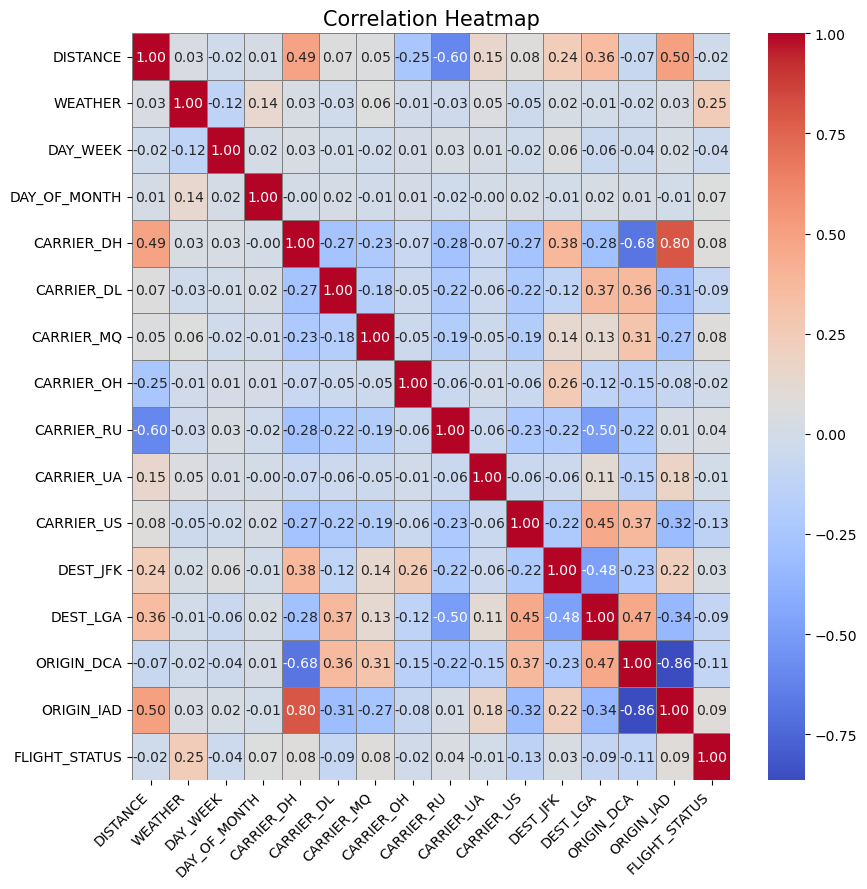

In [26]:
#Plotting the heatmap to show the correlation
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 10},
            linewidths=0.5, linecolor='gray')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap", fontsize=15)
plt.tight_layout()
plt.show()


1. Specific carriers, such as Carrier US (CARRIER_US) (-0.24) and Carrier DH (CARRIER_DH) (-0.18), show a notable negative correlation with delay minutes, suggesting flights operated by these carriers tend to experience fewer delays.
2. There is a strong positive correlation between flights originating from DCA (ORIGIN_DCA) and IAD (ORIGIN_IAD) (0.86), as well as between flights destined for JFK (DEST_JFK) and LGA (DEST_LGA) (0.47), indicating similar flight patterns or operational conditions between these pairs of airports.


In [27]:
correlation_Target=corr['FLIGHT_STATUS'].drop('FLIGHT_STATUS').round(3)
print(correlation_Target)

DISTANCE       -0.020
WEATHER         0.248
DAY_WEEK       -0.039
DAY_OF_MONTH    0.066
CARRIER_DH      0.078
CARRIER_DL     -0.085
CARRIER_MQ      0.077
CARRIER_OH     -0.018
CARRIER_RU      0.044
CARRIER_UA     -0.010
CARRIER_US     -0.129
DEST_JFK        0.027
DEST_LGA       -0.094
ORIGIN_DCA     -0.106
ORIGIN_IAD      0.089
Name: FLIGHT_STATUS, dtype: float64


Variables selected: "WEATHER","CARRIER_US","CARRIER_DL"

## 1. Fitting KNN MODEL

In [28]:
#splitting the dataset
train_data,valid_data=train_test_split(combined_fd,test_size=0.4,random_state=1)
print(train_data.shape,valid_data.shape)

(1320, 16) (880, 16)


In [29]:
train_data.head(5)

,DISTANCE,WEATHER,DAY_WEEK,DAY_OF_MONTH,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD,FLIGHT_STATUS
1247,0.160486,-0.121491,1.626159,0.227766,-0.577350,-0.46274,-0.393517,-0.117579,-0.477157,-0.11955,2.108446,-0.461291,0.956404,0.778357,-0.672417,0
1215,1.287306,-0.121491,1.626159,0.227766,1.732051,-0.46274,-0.393517,-0.117579,-0.477157,-0.11955,-0.474283,-0.461291,0.956404,-1.284758,1.487171,0
1477,0.160486,-0.121491,-0.476736,0.573502,-0.577350,-0.46274,-0.393517,-0.117579,-0.477157,-0.11955,2.108446,-0.461291,0.956404,0.778357,-0.672417,0
1898,0.160486,-0.121491,-1.002460,1.264972,-0.577350,-0.46274,-0.393517,-0.117579,-0.477157,-0.11955,2.108446,-0.461291,0.956404,0.778357,-0.672417,0
83,0.160486,-0.121491,0.574712,-1.616155,-0.577350,-0.46274,-0.393517,-0.117579,-0.477157,-0.11955,2.108446,-0.461291,0.956404,0.778357,-0.672417,0


In [30]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data[["WEATHER","CARRIER_US","CARRIER_DL"]],np.ravel(train_data[["FLIGHT_STATUS"]]))

KNeighborsClassifier(n_neighbors=3)

In [31]:
classification=knn.predict(valid_data[["WEATHER","CARRIER_US","CARRIER_DL"]])

In [32]:
#checking the accuracy score
accuracy=accuracy_score(valid_data[["FLIGHT_STATUS"]],classification)
print(f'accuracy:{accuracy}')

accuracy:0.8272727272727273


In [33]:
# Train a classifier for different values of k
results = []
for k in range(1, 15):
     knn = KNeighborsClassifier(n_neighbors=k).fit(train_data[["WEATHER","CARRIER_US","CARRIER_DL"]], train_data["FLIGHT_STATUS"])
     results.append({
    'k': k,
     'accuracy': accuracy_score(valid_data["FLIGHT_STATUS"], knn.predict(valid_data[["WEATHER","CARRIER_US","CARRIER_DL"]]))
})


In [34]:
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.321591
1    2  0.827273
2    3  0.827273
3    4  0.827273
4    5  0.448864
5    6  0.827273
6    7  0.827273
7    8  0.827273
8    9  0.827273
9   10  0.827273
10  11  0.827273
11  12  0.827273
12  13  0.827273
13  14  0.827273


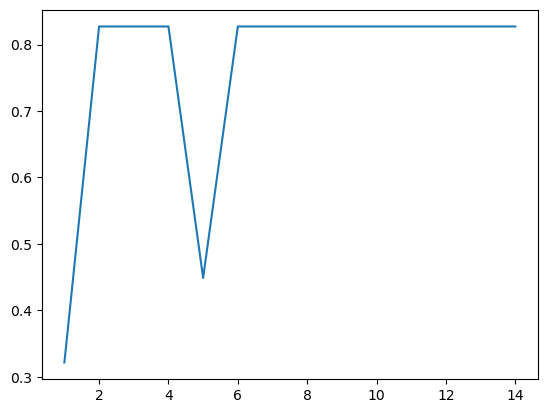

In [35]:
plt.plot(results["k"],results["accuracy"])

Given the highest accuracy and stable performance around that region k=2, k=2 is the optimal choice as it provides the best accuracy without significant fluctuation.

In [36]:
# predicting a new data point with  neighbours
new_data = pd.DataFrame([{"WEATHER":0,"CARRIER_US":True,"CARRIER_DL":False}])
print(new_data)

   WEATHER  CARRIER_US  CARRIER_DL
0        0        True       False


In [37]:
#Train the KNN model on the training data. 
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(combined_fd[["WEATHER","CARRIER_US","CARRIER_DL"]],combined_fd["FLIGHT_STATUS"])
distances, indices = knn.kneighbors(new_data)
print(knn.predict(new_data))
print('Distances',distances)
print('Indices', indices)
print(combined_fd.iloc[indices[0], :])

[0]
Distances [[1.20728651 1.20728651 1.20728651 1.20728651 1.20728651 1.20728651
  1.20728651]]
Indices [[2180 2182 2178 2179 2177 2181 2176]]
      DISTANCE   WEATHER  DAY_WEEK  DAY_OF_MONTH  CARRIER_DH  CARRIER_DL  \
2181  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   
2183  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   
2179  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   
2180  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   
2178  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   
2182  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   
2177  0.160486 -0.121491  1.100435      1.725953    -0.57735    -0.46274   

      CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  DEST_JFK  \
2181   -0.393517   -0.117579   -0.477157    -0.11955    2.108446 -0.461291   
2183   -0.393517   -0.117579   -0.477157    -0.11955    2.108446 -0.461291   
2179   -0.393

In [38]:
print("Accuracy of the KNN Model where k=2 is: ",round(results["accuracy"].max()*100,2),"%")

Accuracy of the KNN Model where k=2 is:  82.73 %


## 2. Fitting the Random Forest Model

In [39]:
le = LabelEncoder()
categorical_features = ['CARRIER', 'DEST', 'ORIGIN', 'TAIL_NUM', 'FL_NUM']
for feature in categorical_features:
    flights_df[feature] = le.fit_transform(flights_df[feature])

In [40]:
# Defining feature set (X) and target variable (y)
X = flights_df.drop(columns=['FLIGHT_STATUS','FL_DATE','CRS_DEP_TIME', 'DEP_TIME'])
y = flights_df['FLIGHT_STATUS']

In [41]:
# Encoding the target variable
y = le.fit_transform(y)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [44]:
# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_1:.2f}')

Accuracy: 0.79


In [45]:
# Print detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       342
           1       0.56      0.30      0.39        98

    accuracy                           0.79       440
   macro avg       0.69      0.61      0.63       440
weighted avg       0.76      0.79      0.77       440



In [46]:
#Trying Ensemble Methods to improve the performance
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# Example of stacking multiple models
stacked_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
], voting='soft')

stacked_model.fit(X_train, y_train)
y_pred_stack = stacked_model.predict(X_test)
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       342
           1       0.71      0.26      0.38        98

    accuracy                           0.81       440
   macro avg       0.77      0.61      0.63       440
weighted avg       0.80      0.81      0.77       440



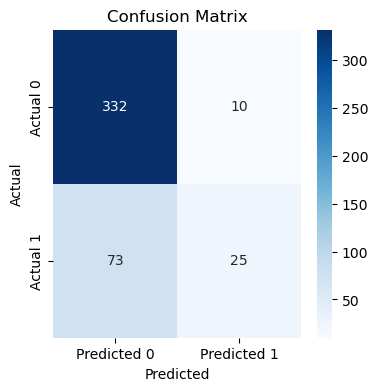

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred_stack)
print(f'Accuracy: {accuracy_2:.2f}')

Accuracy: 0.81


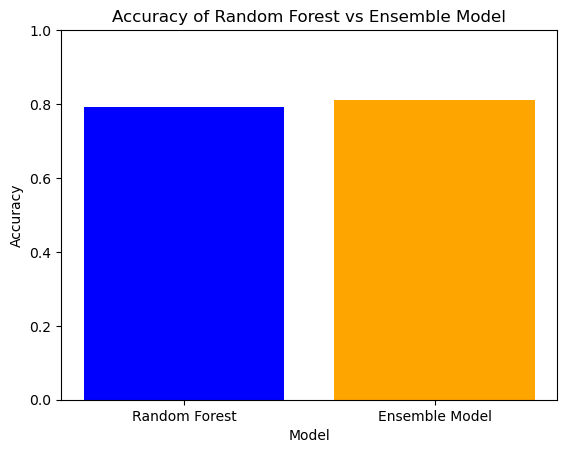

In [49]:
models = ['Random Forest', 'Ensemble Model']
accuracies = [accuracy_1, accuracy_2]

plt.figure()
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim([0, 1])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest vs Ensemble Model')
plt.show()